In [ ]:
import RPi.GPIO as GPIO
from matplotlib import pyplot as plt
from matplotlib import animation
import numpy as np
import random
import time


GPIO.setmode(GPIO.BCM)
TRIG=13 
ECHO=26 
GPIO.setup(TRIG,GPIO.OUT) 
GPIO.setup(ECHO,GPIO.IN) 
GPIO.output(TRIG, GPIO.LOW) 

def distance_check() :
   GPIO.output(TRIG, GPIO.HIGH) 
   time.sleep(0.001) 
   GPIO.output(TRIG, GPIO.LOW)  
   stop=0
   start=0

   while GPIO.input(ECHO)== GPIO.LOW : 
      start=time.time()                                  
   while GPIO.input(ECHO)== GPIO.HIGH : 

      stop=time.time()                                
   duration=stop-start 
   distance=(duration*340*100)/2 
   return distance
   
fig = plt.figure()
ax = plt.axes(xlim=(0, 50), ylim=(4, 13))
line, = ax.plot([], [], lw=1, c='blue', marker='d',ms=2)
max_points = 50
line, = ax.plot(np.arange(max_points), 
                np.ones(max_points, dtype=np.float)*np.nan, lw=1, c='blue',marker='d',ms=2)

def init():
    return line

def animate(i):

    y = distance_check()    
    old_y = line.get_ydata()
    new_y = np.r_[old_y[1:], y]
    line.set_ydata(new_y)
    print(new_y)
    return line,
    
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=200, interval=20, blit=False)
plt.show()

MQTT 연결 성공


C:\Users\강민국\AppData\Local\Temp\ipykernel_412428\592640484.py:40: DeprecationWarning: Callback API version 1 is deprecated, update to latest version
  client = mqtt.Client()


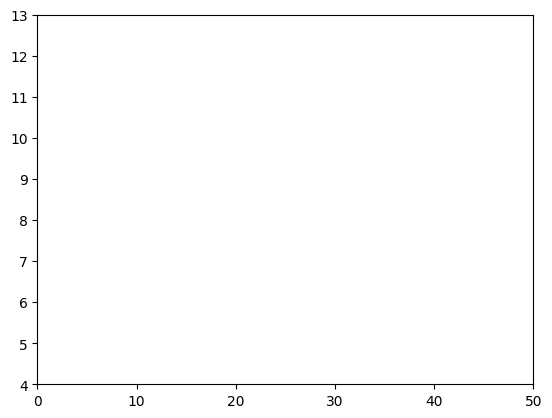

In [7]:
from matplotlib import pyplot as plt
from matplotlib import animation
import numpy as np
import time
import random
import time
from collections import defaultdict
import threading
import paho.mqtt.client as mqtt


fig = plt.figure()
ax = plt.axes(xlim=(0, 50), ylim=(4, 13))
line, = ax.plot([], [], lw=1, c='blue', marker='d',ms=2)
max_points = 50
line, = ax.plot(np.arange(max_points), 
                np.ones(max_points, dtype=np.float_)*np.nan, lw=1, c='blue',marker='d',ms=2)


topic_stats = defaultdict(lambda: {"count": 0, "last_message": "", "last_timestamp": ""})

def on_connect(client, userdata, flags, rc):
    if rc == 0:
        print("MQTT 연결 성공")
        client.subscribe("#")  # 모든 토픽 구독
    else:
        print(f"MQTT 연결 실패: {rc}")
        
def on_message(client, userdata, msg):
    topic = msg.topic
    payload = msg.payload.decode("utf-8")
    timestamp = time.strftime('%Y-%m-%d %H:%M:%S')

    # 통계 업데이트
    topic_stats[topic]["count"] += 1
    topic_stats[topic]["last_message"] = payload
    topic_stats[topic]["last_timestamp"] = timestamp

def start_mqtt():
    client = mqtt.Client()
    client.on_connect = on_connect
    client.on_message = on_message
    client.connect("223.130.131.234", 31883, 60)
    client.loop_forever()

def init():
    return line

def animate(i):

    y = distance_check()    
    old_y = line.get_ydata()
    new_y = np.r_[old_y[1:], y]
    line.set_ydata(new_y)
    print(new_y)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=200, interval=20, blit=False)
#plt.show()

if __name__ =="__main__":
    mqtt_thread = threading.Thread(target=start_mqtt, daemon=True)
    mqtt_thread.start()
    plt.show()

In [9]:
from matplotlib import pyplot as plt
from matplotlib import animation
import numpy as np
import time
from collections import deque
import threading
import paho.mqtt.client as mqtt
import json

# 그래프 설정
fig = plt.figure()
ax = plt.axes(xlim=(0, 50), ylim=(0, 20))
line, = ax.plot([], [], lw=1, c='blue', marker='d', ms=3)

max_points = 50
ydata = deque([np.nan]*max_points, maxlen=max_points)

# MQTT 토픽 통계
latest_value = {"value": 0.0}

def on_connect(client, userdata, flags, rc):
    if rc == 0:
        print("✅ MQTT 연결 성공")
        client.subscribe("#")  # 전체 구독
    else:
        print(f"❌ MQTT 연결 실패: {rc}")

def on_message(client, userdata, msg):
    try:
        payload = msg.payload.decode("utf-8")
        data = json.loads(payload)
        
        # 원하는 값 추출 (예: heading, speed 등)
        if isinstance(data, dict) and "data" in data and "heading" in data["data"]:
            latest_value["value"] = float(data["data"]["heading"])
    except Exception as e:
        print(f"⚠️ 메시지 처리 오류: {e}")

def start_mqtt():
    client = mqtt.Client()
    client.on_connect = on_connect
    client.on_message = on_message
    client.connect("223.130.131.234", 31883, 60)
    client.loop_forever()

def init():
    line.set_ydata([np.nan]*max_points)
    return line,

def animate(frame):
    y = latest_value["value"]
    ydata.append(y)
    line.set_ydata(ydata)
    return line,

# 애니메이션 설정
anim = animation.FuncAnimation(
    fig, animate, init_func=init,
    frames=None, interval=200, blit=True
)
plt.show()
if __name__ == "__main__":
    mqtt_thread = threading.Thread(target=start_mqtt, daemon=True)
    mqtt_thread.start()
    


C:\Users\강민국\AppData\Local\Temp\ipykernel_412428\4020511249.py:57: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  anim = animation.FuncAnimation(


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (0,) and arg 1 with shape (50,).

<Figure size 640x480 with 1 Axes>

C:\Users\강민국\AppData\Local\Temp\ipykernel_412428\4020511249.py:40: DeprecationWarning: Callback API version 1 is deprecated, update to latest version
  client = mqtt.Client()


✅ MQTT 연결 성공
